# Teste Técnico - Felipe Soares Sá

Neste Jupyter Notebook será feita uma análise exploratória das licitações dos órgãos públicos do Rio Grade do Sul entre os anos de 2016 e 2019. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import zipfile

In [2]:
with zipfile.ZipFile('DADOS_2016.zip') as dados_2016:
    with (dados_2016.open('licitacao_2016.csv') as l_2016):
        lic_16 = pd.read_csv(l_2016, low_memory=False)
    with (dados_2016.open('item_2016.csv') as i_2016):
        item_16 = pd.read_csv(i_2016, low_memory=False)

with zipfile.ZipFile('DADOS_2017.zip') as dados_2017:
    with (dados_2017.open('licitacao_2017.csv') as l_2017):
        lic_17 = pd.read_csv(l_2017, low_memory=False)
    with (dados_2017.open('item_2017.csv') as i_2017):
        item_17 = pd.read_csv(i_2017, low_memory=False)
        
with zipfile.ZipFile('DADOS_2018.zip') as dados_2018:
    with (dados_2018.open('licitacao_2018.csv') as l_2018):
        lic_18 = pd.read_csv(l_2018, low_memory=False)
    with (dados_2018.open('item_2018.csv') as i_2018):
        item_18 = pd.read_csv(i_2018, low_memory=False)

with zipfile.ZipFile('DADOS_2019.zip') as dados_2019:
    with (dados_2019.open('licitacao_2019.csv') as l_2019):
        lic_19 = pd.read_csv(l_2019, low_memory=False)
    with (dados_2019.open('item_2019.csv') as i_2019):
        item_19 = pd.read_csv(i_2019, low_memory=False)

df_lic = pd.concat([lic_16, lic_17, lic_18, lic_19])
df_item = pd.concat([item_16, item_17, item_18, item_19])

pd.set_option("display.max_columns", None)

## 1 - Organização dos Data Frames

Nesta etapa, será feita a organizaçao dos data sets mais relevantes para a análise das licitações: **licitacao.csv** e **item.csv**.

### 1.1 - licitação.csv

In [3]:
df_lic.head(3)

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,TP_OBJETO,CD_TIPO_FASE_ATUAL,TP_LICITACAO,TP_NIVEL_JULGAMENTO,DT_AUTORIZACAO_ADESAO,TP_CARACTERISTICA_OBJETO,TP_NATUREZA,TP_REGIME_EXECUCAO,BL_PERMITE_SUBCONTRATACAO,TP_BENEFICIO_MICRO_EPP,TP_FORNECIMENTO,TP_ATUACAO_REGISTRO,NR_LICITACAO_ORIGINAL,ANO_LICITACAO_ORIGINAL,NR_ATA_REGISTRO_PRECO,DT_ATA_REGISTRO_PRECO,PC_TAXA_RISCO,TP_EXECUCAO,TP_DISPUTA,TP_PREQUALIFICACAO,BL_INVERSAO_FASES,TP_RESULTADO_GLOBAL,CNPJ_ORGAO_GERENCIADOR,NM_ORGAO_GERENCIADOR,DS_OBJETO,CD_TIPO_FUNDAMENTACAO,NR_ARTIGO,DS_INCISO,DS_LEI,DT_INICIO_INSCR_CRED,DT_FIM_INSCR_CRED,DT_INICIO_VIGEN_CRED,DT_FIM_VIGEN_CRED,VL_LICITACAO,BL_ORCAMENTO_SIGILOSO,BL_RECEBE_INSCRICAO_PER_VIG,BL_PERMITE_CONSORCIO,DT_ABERTURA,DT_HOMOLOGACAO,DT_ADJUDICACAO,BL_LICIT_PROPRIA_ORGAO,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016.0,OUS,ADH,MPR,G,NaN,IU,N,NaN,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A,NaN,NaN,Contratação de arbitragem dos jogos do 2º camp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,N,2016-01-12,2016-01-19,2016-01-19,S,NaN,NaN,J,6233397000148.0,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016.0,COM,ADH,MPR,I,NaN,IT,N,NaN,N,N,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Aquisição de merenda escolar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11216.5,NaN,NaN,N,2016-01-22,2016-01-29,2016-01-29,S,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016.0,COM,ADH,MPR,I,NaN,IT,N,NaN,N,N,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,N,2016-01-26,2016-02-01,2016-02-01,S,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N


In [4]:
df_item.head(3)

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,VL_UNITARIO_ESTIMADO,VL_TOTAL_ESTIMADO,DT_REF_VALOR_ESTIMADO,PC_BDI_ESTIMADO,PC_ENCARGOS_SOCIAIS_ESTIMADO,CD_FONTE_REFERENCIA,DS_FONTE_REFERENCIA,TP_RESULTADO_ITEM,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_HOMOLOGADO,PC_BDI_HOMOLOGADO,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,77200,15.0,2016,PRP,1,2,2,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",10.0,UN,1500.0,15000.0,NaN,NaN,NaN,NaN,NaN,A,1430.0,14300.00,0.0,0.0,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
1,77200,15.0,2016,PRP,1,4,4,"Pneu 12.4x24 garra baixa, 10 lonas",4.0,UN,1260.0,5040.0,NaN,NaN,NaN,NaN,NaN,A,1258.0,5032.00,0.0,0.0,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN
2,77200,15.0,2016,PRP,1,7,7,Pneu 1400x24 mínimo 12 lonas,6.0,UN,2000.0,12000.0,NaN,NaN,NaN,NaN,NaN,A,1998.0,11988.00,0.0,0.0,M,745.0,632.0,J,8774832000177.0,NaN,NaN,L,NaN,NaN


Do data frame **df_lic**, referente aos dados das licitações, pode-se observar que as colunas mais relevantes parecem ser:

- **CD_ORGAO:** Decreve o código de cada órgão que lançou algum processo de licitação.
- **NM_ORGAO:** Nome dos órgãos públicos envolvidos com licitações.
- **ANO_LICITACAO:** Ano das licitações.
- **DS_OBJETO:** Descrição do objeto adquirido por meio da licitação.
- **VL_HOMOLOGADO:** Valor homologado da licitação.
- **DT_ABERTURA:** Data de abertura do processo de licitação.
- **DT_HOMOLOGACAO:** Data de holomogação do processo de licitação.

Adicionalmente, como o interesse está nas licitações relacionadas a *compras* de objetos (ou serviços), criou-se um filtro para o data frame onde somente as licitações referentes à compra de algum item ficarão disponíveis:

In [5]:
filt = (df_lic['TP_OBJETO'] == 'COM')

Aplicando-se o filtro acima, foi possível criar um novo data frame somente com as licitações relacionadas à compra:

In [6]:
df_lic_clean = df_lic.loc[filt,['CD_ORGAO','NM_ORGAO','ANO_LICITACAO','DS_OBJETO','VL_HOMOLOGADO','DT_ABERTURA','DT_HOMOLOGACAO']].reset_index(drop=True)

In [7]:
df_lic_clean['DT_ABERTURA'] = pd.to_datetime(df_lic_clean['DT_ABERTURA'], errors = 'coerce')
df_lic_clean['DT_HOMOLOGACAO'] = pd.to_datetime(df_lic_clean['DT_HOMOLOGACAO'], errors = 'coerce')

df_lic_clean['TP_PROCESSO'] = (df_lic_clean['DT_HOMOLOGACAO'] - df_lic_clean['DT_ABERTURA']).dt.days

Foi útil transformar os items das colunas **DT_ABERTURA** e **DT_HOMOLOGACAO** no formato de datetime64. Também criou-se uma coluna adicional com a diferença de dias entre a data de abetura e de holomogação das licitações. Essa coluna foi nomeada como **TP_PROCESSO**.

Obteve-se a versão organizada do primeiro data frame:

In [8]:
df_lic_clean.head(4)

,CD_ORGAO,NM_ORGAO,ANO_LICITACAO,DS_OBJETO,VL_HOMOLOGADO,DT_ABERTURA,DT_HOMOLOGACAO,TP_PROCESSO
0,84100,PM DE ESPERANÇA DO SUL,2016,Aquisição de merenda escolar,NaN,2016-01-22,2016-01-29,7.0
1,82701,CM DE XANGRI-LÁ,2016,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,NaN,2016-01-26,2016-02-01,6.0
2,84100,PM DE ESPERANÇA DO SUL,2016,Aquisição de materiais de limpeza para as dive...,NaN,2016-02-02,2016-02-11,9.0
3,53100,PM DE NOVA PALMA,2016,Aquisição de tubos de concreto,NaN,2016-02-12,2016-02-15,3.0


### 1.2 - item.csv

Analogamente, do data frame **df_item**, pode-se observar que as colunas mais relevantes são:

- CD_ORGAO
- DS_ITEM
- ANO_LICITACAO
- VL_UNITARIO_ESTIMADO
- VL_UNITARIO_HOMOLOGADO
- VL_TOTAL_ESTIMADO
- VL_TOTAL_HOMOLOGADO

In [9]:
df_item_clean = df_item.loc[:,['CD_ORGAO','DS_ITEM', 'ANO_LICITACAO', 'VL_UNITARIO_ESTIMADO', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_ESTIMADO', 'VL_TOTAL_HOMOLOGADO']].reset_index(drop=True)

Obteve-se o segudo data frame organizado:

In [10]:
df_item_clean.head(4)

,CD_ORGAO,DS_ITEM,ANO_LICITACAO,VL_UNITARIO_ESTIMADO,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO
0,77200,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",2016,1500.0,1430.0,15000.0,14300.00
1,77200,"Pneu 12.4x24 garra baixa, 10 lonas",2016,1260.0,1258.0,5040.0,5032.00
2,77200,Pneu 1400x24 mínimo 12 lonas,2016,2000.0,1998.0,12000.0,11988.00
3,77200,"Pneu 17.5x25 12 lonas, capacidade mínima de ca...",2016,3000.0,2978.0,12000.0,11912.00


## 2 - Análise dos gastos com licitações 2016 - 2019

Inicialmente, foram analisados os aspectos gerais dos gastos com licitações dos últimos quatro anos (2016 - 2019). Primeiramente, calculou-se os gastos totais de cada ano. 

In [11]:
df_lic_clean[df_lic_clean['VL_HOMOLOGADO']=='#################']

,CD_ORGAO,NM_ORGAO,ANO_LICITACAO,DS_OBJETO,VL_HOMOLOGADO,DT_ABERTURA,DT_HOMOLOGACAO,TP_PROCESSO
42825,44500,PM DE CANOAS,2018,REGISTRO DE PREÇOS DE INSUMOS,#################,2018-08-17,2018-10-03,47.0


In [12]:
df_lic_clean.loc[42825,'VL_HOMOLOGADO'] = np.nan

In [13]:
df_lic_clean.loc[[42825]]

,CD_ORGAO,NM_ORGAO,ANO_LICITACAO,DS_OBJETO,VL_HOMOLOGADO,DT_ABERTURA,DT_HOMOLOGACAO,TP_PROCESSO
42825,44500,PM DE CANOAS,2018,REGISTRO DE PREÇOS DE INSUMOS,NaN,2018-08-17,2018-10-03,47.0


Acima, foi necessária uma correção pontual no data frame por conta de um item problemático na coluna **VL_HOMOLOGADO**.

In [14]:
gasto_anual = []
gasto_total = 0

for ano in range(2016,2020):
    gasto_anual.append(df_lic_clean[df_lic_clean['ANO_LICITACAO']==ano]['VL_HOMOLOGADO'].astype('float').dropna().sum())
    gasto_total += gasto_anual[ano-2016]
    print(f'Os gastos do ano de {ano} foram de : {np.format_float_scientific(gasto_anual[ano-2016],2)}')
    
print(f'gastos dos quatro anos: {np.format_float_scientific(gasto_total,2)}')

Os gastos do ano de 2016 foram de : 5.67e+09
Os gastos do ano de 2017 foram de : 1.94e+09
Os gastos do ano de 2018 foram de : 1.75e+09
Os gastos do ano de 2019 foram de : 3.22e+09
gastos dos quatro anos: 1.26e+10


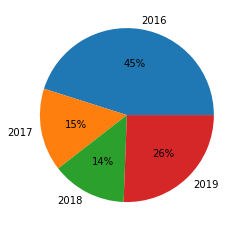

In [15]:
labels_anual = ['2016', '2017', '2018', '2019']

#colors = sns.color_palette('pastel')[0:5]


plt.pie(gasto_anual, labels = labels_anual, autopct='%.0f%%')
plt.show()

Existe uma diferença significativa entre os gastos de 2017, 2018 e 2019 se comparado com o ano de 2016. Vale aqui resaltar que existe uma quantidade de valores nulos (**NaN**) na coluna **VL_HOMOLOGADO**.

In [16]:
num_NaN = df_lic_clean['VL_HOMOLOGADO'].isnull().value_counts()[1]

perc_NaN = (num_NaN/len(df_lic_clean))*100

print(f'Quase {str(perc_NaN)[0:2]}.{str(perc_NaN)[3:5]} % dos valores homologados das licitações não foram registrados, correspondendo a {num_NaN} licitações não registradas de um total de {len(df_lic_clean)}.')

Quase 58.51 % dos valores homologados das licitações não foram registrados, correspondendo a 48216 licitações não registradas de um total de 82405.


Chama a atenção essa quantidade de valores nulos, o que pode significar que mais da metade dos valores das licitações não estão sendo devidamente cadastrados no sistema. Como esses não cadastros se distribuem ao longo dos quatro anos:

In [17]:
for ano in range(2016, 2020):
    x = df_lic_clean.loc[(df_lic_clean['ANO_LICITACAO'] == ano),['VL_HOMOLOGADO']].isnull().value_counts()[1]
    y = len(df_lic_clean.loc[(df_lic_clean['ANO_LICITACAO'] == ano),['VL_HOMOLOGADO']])
    p = (x/y)*100
    print(f'Em {ano} não foram registrados {x} licitações, correspondendo a {str(p)[0:2]}.{str(p)[3:5]} % dos licitações.')

Em 2016 não foram registrados 6904 licitações, correspondendo a 55.01 % dos licitações.
Em 2017 não foram registrados 12938 licitações, correspondendo a 57.18 % dos licitações.
Em 2018 não foram registrados 15078 licitações, correspondendo a 60.55 % dos licitações.
Em 2019 não foram registrados 13296 licitações, correspondendo a 59.54 % dos licitações.


O percentual de valores das licitações não cadastrados em cada ano não são muito diferentes. Aparentemente, esse é um problema que vem ocorrendo há algum tempo.

Também é interessante análisar os gastos mês a mês ao longo dos quatro anos. Dessa forma, será possível ter uma melhor precisão a respeito da variação de gastos a cada mês e também comparar meses de diferentes anos.

In [18]:
gastos_mensais = {}

for ano in range(2016,2020):
    gastos_mensais[str(ano)] = []
    for mes in range(1,13):
        if mes == 1 or mes == 3 or mes == 5 or mes == 7 or mes == 8:
            x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-0{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-0{mes}-31'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
            gastos_mensais[str(ano)].append(x)
        elif mes == 10 or mes == 12:
            x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-{mes}-31'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
            gastos_mensais[str(ano)].append(x)
        elif mes == 11:
            x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-{mes}-30'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
            gastos_mensais[str(ano)].append(x)
        elif mes == 2:
            if ano == 2016:
                x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-0{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-0{mes}-29'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
                gastos_mensais[str(ano)].append(x)
            else:
                x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-0{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-0{mes}-28'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
                gastos_mensais[str(ano)].append(x)
        else:
            x = df_lic_clean.loc[(df_lic_clean['DT_HOMOLOGACAO'] > np.datetime64(f'{ano}-0{mes}-01')) & (df_lic_clean['DT_HOMOLOGACAO'] < np.datetime64(f'{ano}-0{mes}-30'))]['VL_HOMOLOGADO'].astype('float').dropna().sum()
            gastos_mensais[str(ano)].append(x)

In [19]:
gastos_mensais = pd.DataFrame.from_dict(gastos_mensais)

In [20]:
gastos_mensais

,2016,2017,2018,2019
0,1.858581e+06,7.542436e+07,9.516741e+07,1.350173e+08
1,1.424892e+06,6.565115e+07,8.081317e+07,1.361700e+08
2,1.058717e+07,3.633436e+08,2.492178e+08,1.510093e+08
3,4.800707e+06,7.589896e+07,1.718367e+08,1.838950e+09
4,8.739372e+07,1.199591e+08,1.402331e+08,1.823274e+08
5,6.142372e+07,1.423300e+08,1.161968e+08,1.795061e+08
6,4.773746e+09,2.071959e+08,2.040401e+08,1.530371e+08
7,2.710201e+08,1.005984e+08,1.206055e+08,2.879248e+08
8,5.295462e+07,2.091878e+08,1.177313e+08,1.094433e+08
9,6.474507e+07,1.152178e+08,8.412029e+07,1.036661e+08


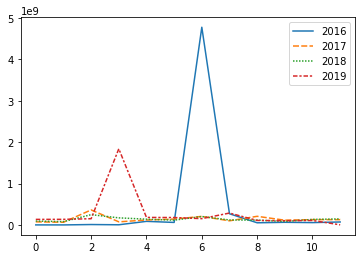

In [21]:
sns.lineplot(data=gastos_mensais)
plt.show()

In [22]:
gastos_mensais.mean()

2016    4.549893e+08
2017    1.443791e+08
2018    1.383801e+08
2019    2.824903e+08
dtype: float64

Os gastos mensais com licitações parecem ficar em torno dos 140 milhões de reais mensais, exceto no período de jul/2016 e abril/2019. Seria interessante investigar mais a fundo o porquê dos gastos serem expressivamente maiores nesses períodos. 

Também vale a pena investigar rapidamente o tempo entre a abetura e a homologação da licitação.

In [23]:
df_lic_clean['TP_PROCESSO'].dropna().describe()

count    60396.000000
mean        11.852109
std         23.947555
min        -29.000000
25%          1.000000
50%          5.000000
75%         13.000000
max        778.000000
Name: TP_PROCESSO, dtype: float64

<AxesSubplot:>

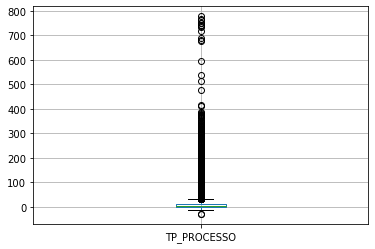

In [24]:
df_lic_clean.boxplot('TP_PROCESSO')

Pelo boxplot acima, foi possível observar que existe uma quantidade significativa de outliers, o que explica o alto desvio padrão do conjunto de dados. Evidentemente, sem fazer condiderações estatísticas extramamente rigorosas, é possível recalcular o tempo médio entre a abetura e a homologação das licitações.

In [25]:
df_lic_clean[(df_lic_clean['TP_PROCESSO'] < 35) & (df_lic_clean['TP_PROCESSO'] > 0)]['TP_PROCESSO'].dropna().describe()

count    41514.000000
mean         9.325505
std          7.894623
min          1.000000
25%          3.000000
50%          7.000000
75%         13.000000
max         34.000000
Name: TP_PROCESSO, dtype: float64

Eliminando os outliers e os tempos negativos, obteve-se um desvio padrão mais aceitável e um tempo médio para o processo de licitação de praticamente 9 dias. Contudo, com o desvio padrão é de quase 8 dias. Dessa forma, é seguro dizer que o processo de licitação pode levar de 2 a 16 dias para ser homologado.

## 3 - Análise dos orgãos governamentais

Nessa seção, será analisado com mais detalhes o perfil dos órgãos governamentais que realizaram as licitações.

In [26]:
(df_lic_clean['NM_ORGAO'].value_counts(normalize=True)*100).head(10)

PM DE GUAPORÉ                              2.185547
CENTRAL DE LICITAÇÕES DO ESTADO            1.518112
PM DE PELOTAS                              1.368849
PM DE PEDRAS ALTAS                         1.333657
SECRETARIA DA SAÚDE DO RS                  1.293611
CIA. RIOGRANDENSE DE SANEAMENTO            1.103088
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO    0.979310
PM DE ERECHIM                              0.955039
PM DE IJUÍ                                 0.946545
PM DE CACHOEIRA DO SUL                     0.935623
Name: NM_ORGAO, dtype: float64

Numa primeira análise, verificou-se que seis PMs (Polícia Militar) aparecem entre os 10 órgãos que mais solicitaram licitações. Parece interessante verificar o número de órgão que correspondem a PMs. Verificamos também que CMs (Câmaras Municipais) correspondem a uma fatia significativa do número total de órgãos.

In [27]:
orgaos = df_lic_clean.drop_duplicates(['CD_ORGAO'])[['CD_ORGAO','NM_ORGAO']].reset_index(drop=True)

No data frame **orgaos** estão listados o código e o nome de cada órgão que se envolveu em alguma licitação entre 2016 e 2019.

In [28]:
numero_PM = 0
numero_CM = 0

for pm in range(len(orgaos)):
    if (orgaos.loc[pm,['NM_ORGAO']].values)[0][0:2] == 'PM':
        numero_PM += 1
    elif (orgaos.loc[pm,['NM_ORGAO']].values)[0][0:2] == 'CM':
        numero_CM += 1
       
print(f'Dos {len(orgaos)} órgãos registrados, {numero_PM} correspondem a PMs e {numero_CM} CMs. Juntos PM e CM correspondem a {((numero_PM + numero_CM) / len(orgaos))*100} % do total de órgãos.')     

Dos 843 órgãos registrados, 488 correspondem a PMs e 226 CMs. Juntos PM e CM correspondem a 84.69750889679716 % do total de órgãos.


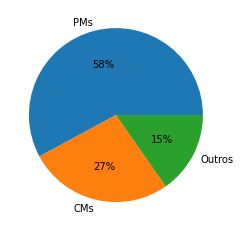

In [29]:
outros = len(orgaos) - (numero_PM + numero_CM)

main_orgaos = [numero_PM, numero_CM, outros]
labels = ['PMs', 'CMs', 'Outros']

#colors = sns.color_palette('pastel')[0:5]


plt.pie(main_orgaos, labels = labels, autopct='%.0f%%')
plt.show()

Embora PMs e CMs constituam quase 85% dos órgãos que fizeram licitações entre 2016-2019, será que eles foram os que mais gastaram? 

In [30]:
no_nan = df_lic_clean.dropna(subset=['VL_HOMOLOGADO']).reset_index(drop=True)

gasto_PM = 0
gasto_CM = 0
gasto_outros = 0

for gasto in range(len(no_nan)):
    if no_nan['NM_ORGAO'][gasto][:2] == 'PM':
        gasto_PM += float(no_nan['VL_HOMOLOGADO'][gasto])
    elif no_nan['NM_ORGAO'][gasto][:2] == 'CM':
        gasto_CM += float(no_nan['VL_HOMOLOGADO'][gasto])
    else:
        gasto_outros += float(no_nan['VL_HOMOLOGADO'][gasto])

print(np.format_float_scientific(gasto_PM, precision = 3, exp_digits=2))
print(np.format_float_scientific(gasto_CM, precision = 3, exp_digits=2))
print(np.format_float_scientific(gasto_outros, precision = 3, exp_digits=2))

1.197e+10
1.888e+07
5.863e+08


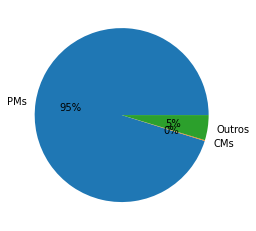

In [31]:
labels = ['PMs', 'CMs', 'Outros']

plt.pie([gasto_PM, gasto_CM, gasto_outros], labels = labels, autopct='%.0f%%')
plt.show()

Surpreendentemente, 95 % dos gastos com licitações pertemcem a PMs. Evidentemente uma participação alta nos gastos totais era esperada, contudo, esse valor parece estranho. Mais ainda, os gastos das CMs praticamente não aparecem no gráfico. Detectou-se também que os gastos das CMs é 1000 vezes menor dos que os das PMs.

In [32]:
df_CM = df_lic_clean[df_lic_clean['NM_ORGAO'].str.match('CM') == True].reset_index(drop=True)

In [33]:
null_true = df_CM['VL_HOMOLOGADO'].isnull().value_counts()[1]
null_false = df_CM['VL_HOMOLOGADO'].isnull().value_counts()[0]

print(f'Não constam {null_true} licitações na base de dados, enquanto que {null_false} aparecem, ou seja, aproximadamente {(null_true/len(df_CM))*100} das licitações feitas por CMs não foram cadastradas.')

Não constam 1837 licitações na base de dados, enquanto que 505 aparecem, ou seja, aproximadamente 78.43723313407344 das licitações feitas por CMs não foram cadastradas.


## 4 - Análise dos items licitados

Nessa última seção,o foco será nos itens que foram licitados entre 2016-2019.

In [34]:
num_itens = len(df_item_clean.drop_duplicates(['DS_ITEM']))

print(f'Foram registradas as compras de {num_itens} itens diferentes nas licitações.')

Foram registradas as compras de 1854068 itens diferentes nas licitações.


Dada a variedade de itens cadastrados, uma vez que não existe uma padronização para esse cadastro, possívelmente existem itens iguais que foram cadastrados com nomes diferentes. Uma ideia aqui seria então análisar os itens comprados por tipos de órgãos. Como PMs e CMs somam quase 85 % de todas as licitações, vale a pena investigar os itens comprados por esses dois tipos de órgãos. Iniciando pelas CMs:

In [35]:
codigos_CM = []

for cod in range(len(orgaos)):
    if orgaos.loc[cod,['NM_ORGAO']].str.match('CM').item() == True:
        codigos_CM.append(orgaos.loc[cod,['CD_ORGAO']].item())
        
print(len(codigos_CM))

226


In [36]:
df_item_CM = pd.DataFrame(columns=df_item_clean.columns)

for item in range(len(codigos_CM)):
    df_item_CM = pd.concat([df_item_CM, df_item_clean[df_item_clean['CD_ORGAO'] == codigos_CM[item]]])
    
df_item_CM.reset_index(drop=True, inplace=True)

In [37]:
df_item_CM

,CD_ORGAO,DS_ITEM,ANO_LICITACAO,VL_UNITARIO_ESTIMADO,VL_UNITARIO_HOMOLOGADO,VL_TOTAL_ESTIMADO,VL_TOTAL_HOMOLOGADO
0,82701,"CONTRATAÇÃO DE EMPRESA DE LIMPEZA, HIGIENIZAÇÃ...",2016,10909.04,7999.97,10909.04,7999.97
1,82701,AQUISIÇÃO DE PROTOCOLADORA,2016,1792.00,1792.00,1792.00,1792.00
2,82701,CONTRATAÇÃO DE EMPRESA RADIOFÔNICA,2016,8293.33,8290.00,8293.33,8290.00
3,82701,"CONTRATAÇÃO DE EMPRESA DE LIMPEZA, HIGEINIZAÇÃ...",2016,10715.29,NaN,10715.29,NaN
4,82701,CONTRATAÇÃO DE EMPRESA PARA LIMPEZA DA CAIXA D...,2016,200.00,NaN,200.00,NaN
...,...,...,...,...,...,...,...
32039,84501,Carregador de Baterias com 8 baterias - Multi...,2019,119.00,NaN,119.00,NaN
32040,84501,Multifuncional Eco Tank L3 150 - Epson,2019,1250.00,NaN,1250.00,NaN
32041,84501,Roteador Wireless Semi Profissional - TP LINK,2019,299.00,NaN,299.00,NaN
32042,84501,"Notebook Acer AMD A 10 2,4 Ghz, 4 GB RAM 1TB H...",2019,2490.00,NaN,4980.00,NaN


O dataframe **df_item_CM** contém todos os itens comprados pelas CMs entre 2016 e 2019. 

In [38]:
df_item_CM['DS_ITEM'].value_counts().head(10)

SERVIÇO                         60
SERVIÇOS DE TELECOMUNICAÇÕES    31
SERVIÇOS GRÁFICOS               26
CARTUCHO                        22
Gasolina aditivada              21
Objetiva 70-200MM               20
CANETA                          18
ASSINATURA DE JORNAL            18
CONECTOR                        15
Objetiva 24-70MM                14
Name: DS_ITEM, dtype: int64

Parece difícil enxergar um padrão nos itens comprados pelas CMs. Olhando os dez itens mais licitados, existe uma recorrência muito grande de itens que começam com *SERVIÇO*. Um caminho seria começar agrupando todos os itens que foram considerados pelas CMs como alguma prestação de serviço ou algo similar. 

In [39]:
df_item_CM['DS_ITEM'].str.match('SERVIÇO').value_counts()

False    31753
True       291
Name: DS_ITEM, dtype: int64

A nossa tentativa não foi bem sucedida. Os itens que começam com serviço constituem apenas uma fração muito pequena do total. 

In [40]:
total_itens_CM = df_item_CM['VL_TOTAL_HOMOLOGADO'].dropna().astype('float').sum()

razao_CM = total_itens_CM / gasto_CM

print(f'Os cálculo dos gatos com licitações feito pelas CM com base no items licitados é {str(razao_CM)[:4]} vezes maior do que o valor calculado por meio do valor das licitações.')

Os cálculo dos gatos com licitações feito pelas CM com base no items licitados é 6.81 vezes maior do que o valor calculado por meio do valor das licitações.


Essa diferença 6.81 vezes entre os dois cálculos de gastos das CMs é expressiva, ainda mais quando se tratam de orçamentos milionários (ou até mesmo bilionários). Claro que é difícil dizer a que se deve essa diferença. Em ambos os casos existem muitos valores nulos (NaN). Possivelmente esse valores ficariam mais próximos caso não existissem tantos NaN nos data frames. 